# jammer
## Issue 18: Violine plot
### Part I: Make some violin plots

gully  
May 17, 2017

## Violin plot

In [1]:
import pandas as pd

In [2]:
vdf = pd.DataFrame()

In [3]:
bases = ['Teff', 'logg', 'vz', 'vi', 'logO', 'c1', 'c2', 'c3', 'SA', 'LA','ll']

In [4]:
n_s = 200

In [5]:
base_dict = {'LA': 9,
 'SA': 8,
 'Teff': 0,
 'c1': 5,
 'c2': 6,
 'c3': 7,
 'll': 10,
 'logO': 4,
 'logg': 1,
 'vi': 3,
 'vz': 2}

In [6]:
ms = np.arange(100, 123+1)

In [7]:
ms

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123])

### Just H band

In [8]:
bases

['Teff', 'logg', 'vz', 'vi', 'logO', 'c1', 'c2', 'c3', 'SA', 'LA', 'll']

In [9]:
total_vdf = pd.DataFrame()
for m in ms:
    try:
        ws = np.load("../sf/2M0136/m{:03d}/output/marley_grid/run01/emcee_chain.npy".format(m))
        gi = ws[0,:,0] != 0.0
        print("Order {}: {} samples".format(m, gi.sum()))
        ws = ws[:,gi,:]
        burned = ws[:, -1*n_s:,:]
        xs, ys, zs = burned.shape
        fc = burned.reshape(xs*ys, zs)
        for base in bases:
            vdf[base] = fc[:,base_dict[base]]
        vdf['m_val'] = m
        total_vdf = total_vdf.append(vdf, ignore_index=True)
    except FileNotFoundError:
        print("Order {}: FAIL".format(m))
        fc = np.random.normal(-9e9, 0.1, size=8000)
        for base in bases:
            vdf[base] = fc
        vdf['m_val'] = m
        total_vdf = total_vdf.append(vdf, ignore_index=True)

Order 100: FAIL
Order 101: FAIL
Order 102: FAIL
Order 103: FAIL
Order 104: 5000 samples
Order 105: FAIL
Order 106: FAIL
Order 107: FAIL
Order 108: 5000 samples
Order 109: 5000 samples
Order 110: 5000 samples
Order 111: 5000 samples
Order 112: 5000 samples
Order 113: 5000 samples
Order 114: 5000 samples
Order 115: 5000 samples
Order 116: 5000 samples
Order 117: 5000 samples
Order 118: 5000 samples
Order 119: FAIL
Order 120: FAIL
Order 121: FAIL
Order 122: FAIL
Order 123: FAIL


In [10]:
total_vdf = total_vdf.sort_values("m_val", ascending=False)

## Add central wavelength metadata to the axes labels

In [11]:
ig_ord = pd.read_csv('../../welter/data/analysis/IGRINS_mix_emcee_last200.csv', usecols=['m_val', 'wl_center'])

In [12]:
total_vdf = pd.merge(total_vdf, ig_ord, on='m_val')

## Split orders into reliable and unreliable

In [13]:
total_vdf.m_val.unique()

array([123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111,
       110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100])

In [14]:
gm = np.array([118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 104])
bm = np.array(list(set(ms) - set(gm)))

In [15]:
g_vdf_i = total_vdf.m_val.isin(gm)
b_vdf_i = total_vdf.m_val.isin(bm)

In [16]:
g_vdf, b_vdf = total_vdf.copy(), total_vdf.copy()

#### This is a total hack because I don't want to figure out how Violin plots actually work!!

In [17]:
g_vdf.Teff[b_vdf_i] = np.random.normal(size=b_vdf_i.sum())
b_vdf.Teff[g_vdf_i] = np.random.normal(size=g_vdf_i.sum())

/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [18]:
sns.set_context('paper', font_scale=1.0)
sns.set_style('ticks')

In [19]:
gm

array([118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 104])

In [20]:
gm.shape, bm.shape

((12,), (12,))

In [21]:
vec1 = ["{}".format(np.int(val)) for val in g_vdf.wl_center.unique()]
vec2 = g_vdf.m_val.unique()

In [22]:
np.array(vec1).shape

(24,)

In [23]:
b_vdf.m_val.unique().shape

(24,)

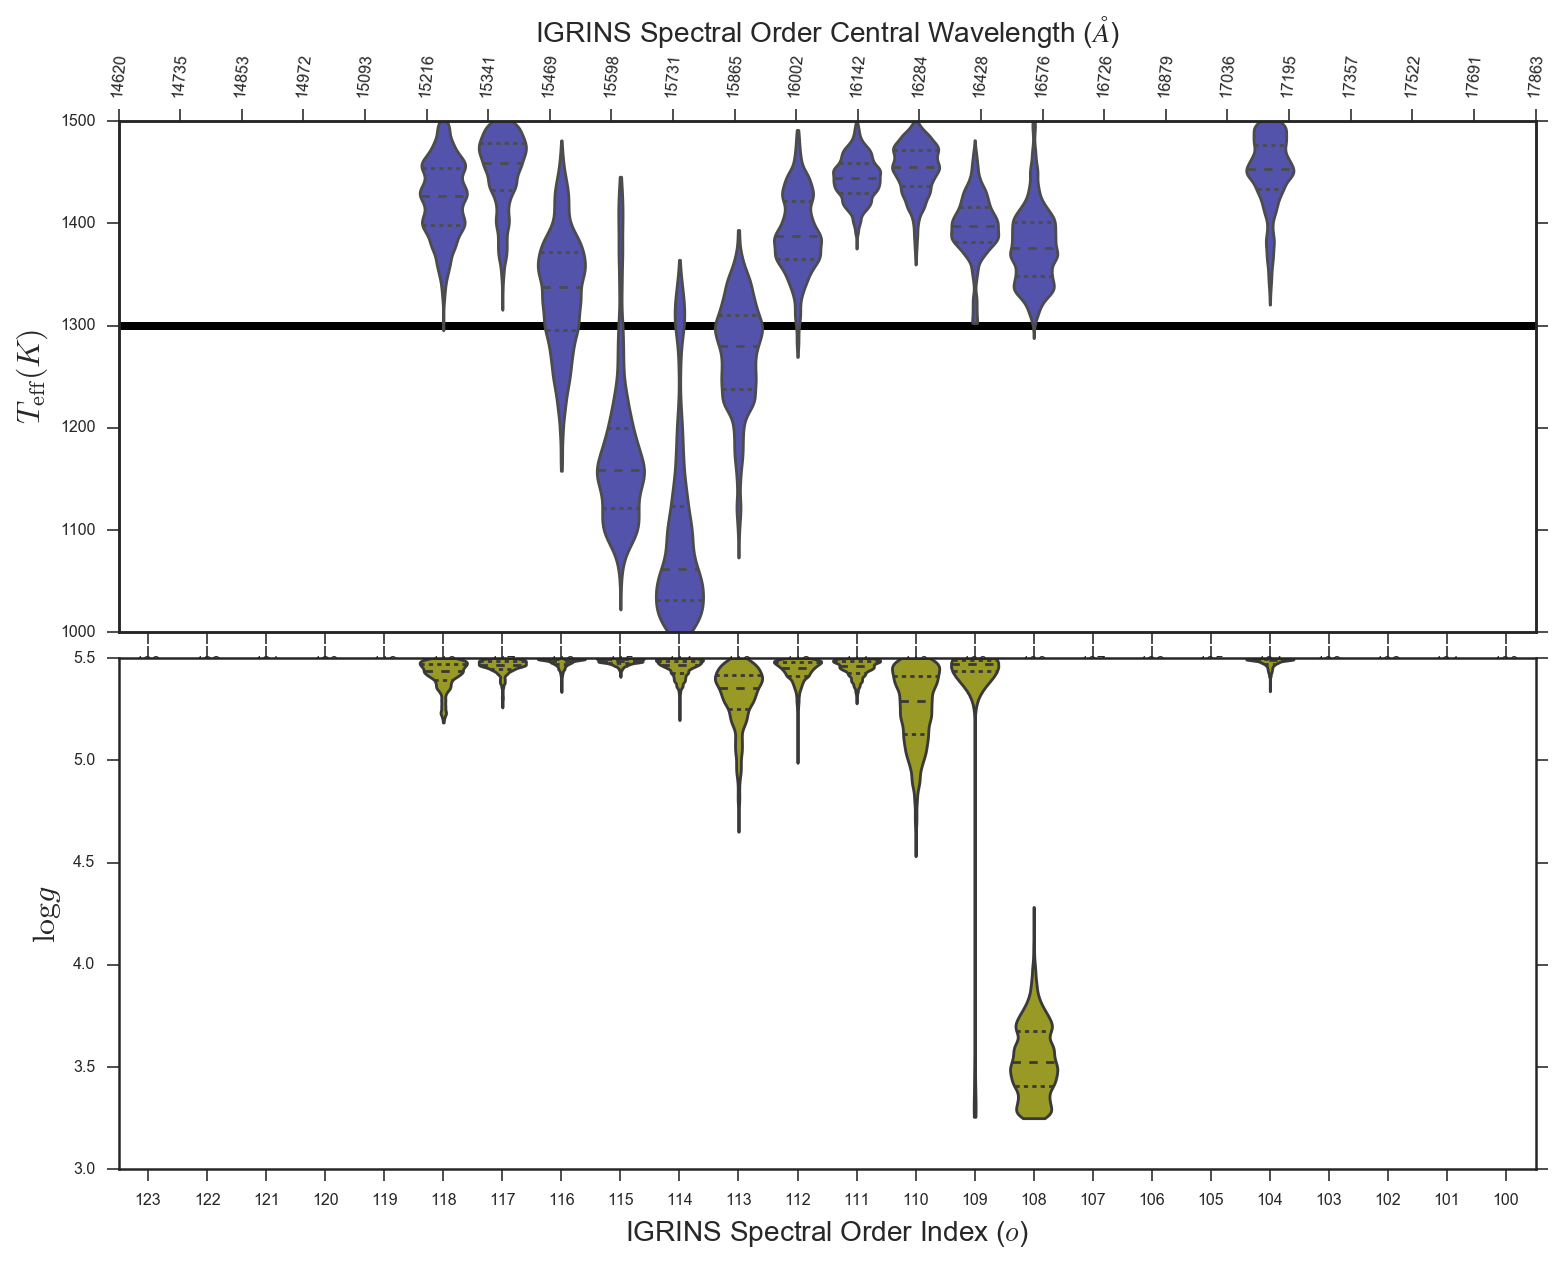

In [24]:
fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(hspace=0.05, bottom=0.03, top=0.94, left=0.12, right=0.94)

ax1 = fig.add_subplot(211)

## Bogus orders
g = sns.violinplot(x="m_val", y="Teff", data=b_vdf, cut=0, scale='width', inner=None,
                   color='b', saturation=0.09, ax=ax1, order=total_vdf.m_val.unique(), alpha=0.01)
for this_col in g.axes.collections:
    this_col.set_alpha(0.2)
    
## Best guess
    
teffa = 1300.0
ax1.axhline(teffa, linewidth=4, color='k', axes=ax1, zorder=0)

## Good orders
sns.violinplot(x="m_val", y="Teff", data=g_vdf, cut=0, scale='width', inner='quartile',
                   color='b', saturation=0.35, ax=ax1, order=total_vdf.m_val.unique())

sns.axlabel(' ', ' ')
ax1.set_ylabel('$T_\mathrm{eff} (K)$', fontdict={"fontsize":16})
ax1.set_ylim(1000, 1500)
#ax1.xaxis.set_major_formatter(plt.NullFormatter())

ax1b = ax1.twiny()

new_tick_locations = vec1

ax1b.set_xticks(ax1.get_xticks())
ax1b.set_xticklabels(new_tick_locations, rotation=85)
ax1b.set_xlabel(r"IGRINS Spectral Order Central Wavelength ($\AA$)", fontsize=14)

## Fill factor

ax2 = fig.add_subplot(212)

g3 = sns.violinplot(x="m_val", y="logg", data=b_vdf, cut=0, scale='width', inner=None,
                   color='y', saturation=0.09, ax=ax2, order=total_vdf.m_val.unique(), alpha=0.01)
for this_col in g3.axes.collections:
    this_col.set_alpha(0.2)
    
ff_guess = 55.0
ax2.axhline(ff_guess, linewidth=4, color='k', axes=ax2, zorder=0)

sns.violinplot(x="m_val", y="logg", data=g_vdf, cut=0, scale='width', inner='quartile',
                   color='y', saturation=0.6, ax=ax2, order=total_vdf.m_val.unique())
ax2.set_xlabel('IGRINS Spectral Order Index ($o$)', fontdict={"fontsize":14})
ax2.set_ylabel('$\log{g}$', fontdict={"fontsize":16})
ax2.set_ylim(3.0, 5.5)

plt.savefig('../results/violin_Teff_order.pdf', bbox_inches='tight')

## Miscellaneous 2-D projections
Color-coded by spectral order

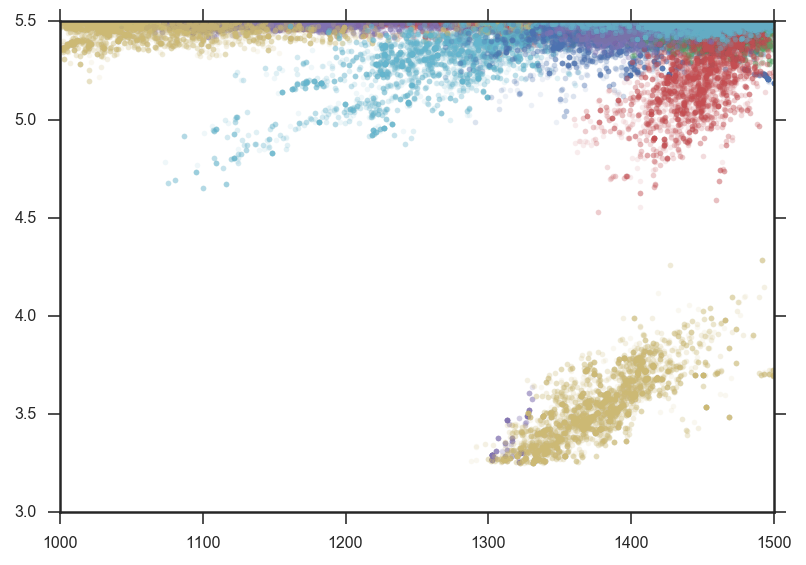

In [25]:
for m in gm:
    ginds = total_vdf.m_val==m
    plt.plot(total_vdf.Teff[ginds], total_vdf.logg[ginds], '.', alpha=0.1)
    plt.xlim(1000, 1500)
    plt.ylim(3, 5.5)

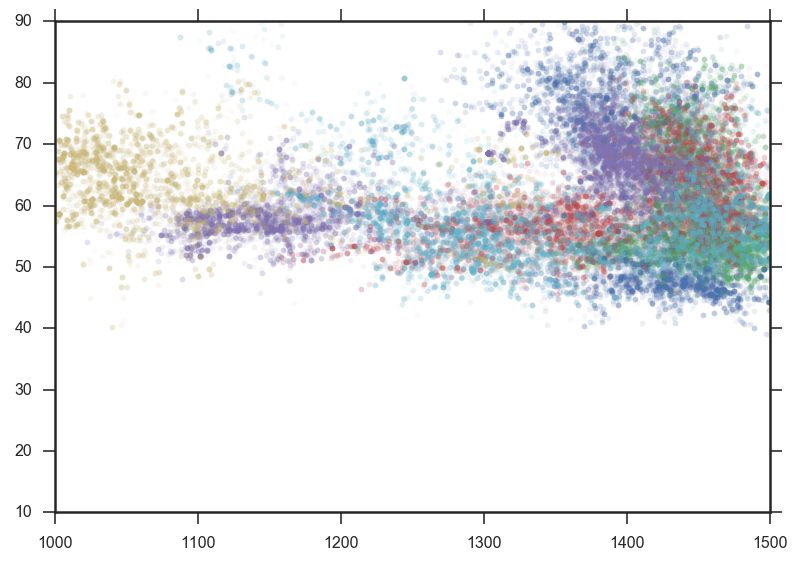

In [26]:
for m in gm:
    ginds = total_vdf.m_val==m
    plt.plot(total_vdf.Teff[ginds], total_vdf.vi[ginds], '.', alpha=0.05)
    plt.xlim(1000, 1500)
    plt.ylim(10, 90)

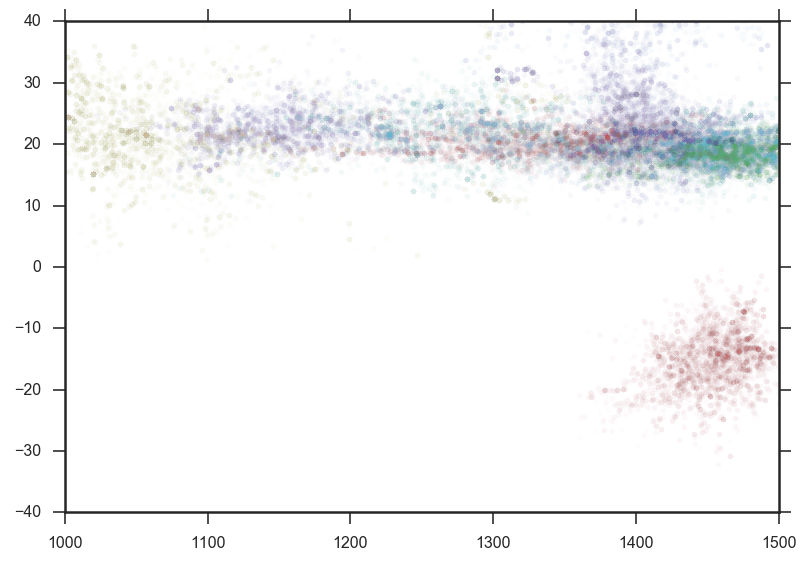

In [27]:
for m in gm:
    ginds = total_vdf.m_val==m
    plt.plot(total_vdf.Teff[ginds], total_vdf.vz[ginds], '.', alpha=0.01)
    plt.xlim(1000, 1500)
    plt.ylim(-40, 40)

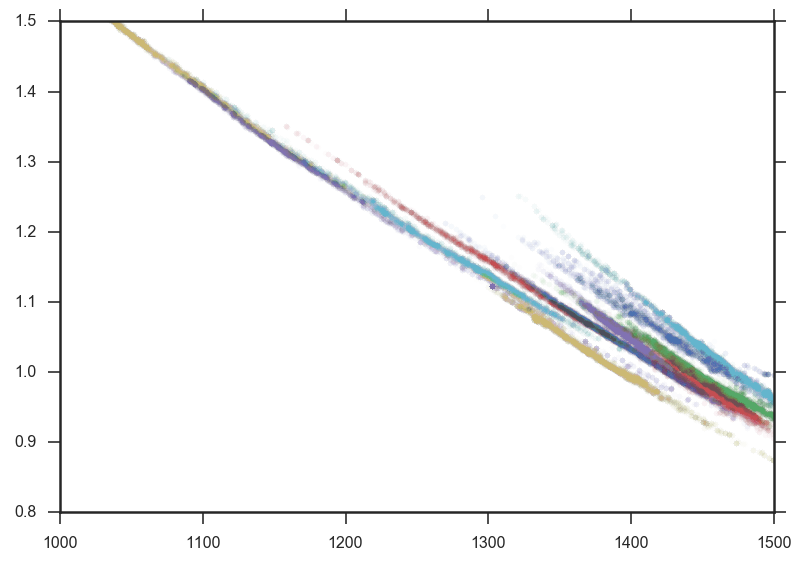

In [28]:
for m in gm:
    ginds = total_vdf.m_val==m
    plt.plot(total_vdf.Teff[ginds], total_vdf.logO[ginds], '.', alpha=0.01)
    plt.xlim(1000, 1500)
    plt.ylim(0.8, 1.5)

The end.